# Molecular Biology (Splice-junction Gene Sequences) Data Set
1. Данные представляют собой набор последовательностей ДНК с именами, которые относятся к трем классам:
    - интрон/экзон граница (IE)
    - экзон/интрон граница (EI)
    - не являющиеся границей (N - Neither)
2. Задача состоит в том, чтобы из опрделенной последовтельности ДНК распознать границы между экзонами (части последовательности ДНК, сохраненные после сращивания/сплайсинга) и интронами (части последовательности ДНК, которые были удалены после сращивания/сплайсинга). Данная задача разбивается на две подзадачи:
    - распознавание экзон/интрон границы (IE), известной как акцептор
    - распознавание интрон/экзон границы (EI), известной как донор
    - распознавание последовательностей, которые не явля.тся ни IE границей, ни EI границей

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import urllib.request as url_req
%matplotlib inline

Устанавливаем прокси, если имеется

In [7]:
proxy_support = url_req.ProxyHandler({"https":"https://proxy-ir.intel.com:911"})
opener = url_req.build_opener(proxy_support)
url_req.install_opener(opener)

Получение данных из репозитория для Машинного обучения Калифорнийского университета (UCI)

In [8]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/molecular-biology/splice-junction-gene-sequences/splice.data"
data = pd.read_csv(url, sep = ', ', engine='python', header = None)

Добавление названия столбцов для полученных данных

In [9]:
data.columns = ["Class", "Name", "Sequence"]
data

,Class,Name,Sequence
0,EI,ATRINS-DONOR-521,CCAGCTGCATCACAGGAGGCCAGCGAGCAGGT...
1,EI,ATRINS-DONOR-905,AGACCCGCCGGGAGGCGGAGGACCTGCAGGGT...
2,EI,BABAPOE-DONOR-30,GAGGTGAAGGACGTCCTTCCCCAGGAGCCGGT...
3,EI,BABAPOE-DONOR-867,GGGCTGCGTTGCTGGTCACATTCCTGGCAGGTA...
4,EI,BABAPOE-DONOR-2817,GCTCAGCCCCCAGGTCACCCAGGAACTGACGTGA...
5,EI,CHPIGECA-DONOR-378,CAGACTGGGTGGACAACAAAACCTTCAGCGGTAA...
6,EI,CHPIGECA-DONOR-903,CCTTTGAGGACAGCACCAAGAAGTGTGCAGGTAC...
7,EI,CHPIGECA-DONOR-1313,CCCTCGTGCGGTCCACGACCAAGACCAGCGGTGAG...
8,EI,GCRHBBA1-DONOR-1260,TGGCGACTACGGCGCGGAGGCCCTGGAGAGGTGAG...
9,EI,GCRHBBA1-DONOR-1590,AAGCTGACAGTGGACCCGGTCAACTTCAAGGTGAG...


# Подготовка данных
Обработка сырых данных, чтобы сделать их пригодными для обработки:
1. Создаем новый список названий стобцов:
    - Class - классы последовательностей (взято без модификаций из полученных данных)
    - Name - название последовательностей (взято без модицикаций из полученных данных)
    - [0..59] столбцы - соответствующее значениям симовлам из последовтельности ДНК, отображения в виде чисел
        * A - 0
        * G - 1
        * T - 2
        * C - 3
        * D - 4
        * N - 5
        * S - 6
        * R - 7
2. Модифицируем серию из столбца 'Sequence' сырых данных в набор серий из столбцов [0..59]
3. Формируем таблицу из стобцов 'Class', 'Name' сырых данных и, полученных на 2 шаге, столбцов [0..59]

In [10]:
dict_seq2num = {} # Словарь для ассоциации символа последовательности с числовым значением
# Ассоциируем каждому символу из последовательности [A, G, T, C, D, N, S, R] числовое значение из диапазона [0..7]
dict_seq2num["A"] = 0
dict_seq2num["G"] = 1
dict_seq2num["T"] = 2
dict_seq2num["C"] = 3
dict_seq2num["D"] = 4
dict_seq2num["N"] = 5
dict_seq2num["S"] = 6
dict_seq2num["R"] = 7
# и обратное преобразовние
dict_num2seq = {}
dict_num2seq[0] = 'A'
dict_num2seq[1] = 'G'
dict_num2seq[2] = 'T'
dict_num2seq[3] = 'C'
dict_num2seq[4] = 'D'
dict_num2seq[5] = 'N'
dict_num2seq[6] = 'S'
dict_num2seq[7] = 'R'

dict_class2num = {} # Словарь для ассоциации класса с числовым значением
# Ассоциируем каждому классу [N, EI, IE] числовое значение из множества [0, 1, 2]
dict_class2num['N'] = 0
dict_class2num['EI'] = 1
dict_class2num['IE'] = 2
# и обратное преобразование
dict_num2class = {}
dict_num2class['N'] = 0
dict_num2class['EI'] = 1
dict_num2class['IE'] = 2

In [11]:
list_of_columns = [] # Создадим пустой список
# Данный список - это названия столбцов будущего Pandas' DataFrame
list_of_columns.extend(['Class', 'Name']) 
list_of_columns.extend(list(range(0,60)))

pd_series_list = [list(dict_seq2num[item.split()[0][i]] for item in data['Sequence'].tolist()) for i in range(0, 60)]

molecular_data = pd.DataFrame(columns=list_of_columns)
molecular_data['Class'] = data['Class']
molecular_data['Name'] = data['Name']
for i in range(0, 60):
    molecular_data[i] = pd_series_list[i]
molecular_data

,Class,Name,0,1,2,3,4,5,6,7,...,50,51,52,53,54,55,56,57,58,59
0,EI,ATRINS-DONOR-521,3,3,0,1,3,2,1,3,...,0,1,3,3,0,1,2,3,2,1
1,EI,ATRINS-DONOR-905,0,1,0,3,3,3,1,3,...,1,2,1,3,3,3,3,3,1,3
2,EI,BABAPOE-DONOR-30,1,0,1,1,2,1,0,0,...,3,0,3,1,1,1,1,0,2,1
3,EI,BABAPOE-DONOR-867,1,1,1,3,2,1,3,1,...,1,1,2,2,2,2,3,3,3,3
4,EI,BABAPOE-DONOR-2817,1,3,2,3,0,1,3,3,...,3,3,2,2,1,0,3,3,3,2
5,EI,CHPIGECA-DONOR-378,3,0,1,0,3,2,1,1,...,1,0,1,0,3,3,0,3,0,1
6,EI,CHPIGECA-DONOR-903,3,3,2,2,2,1,0,1,...,1,2,1,1,3,3,1,3,3,0
7,EI,CHPIGECA-DONOR-1313,3,3,3,2,3,1,2,1,...,1,1,2,3,1,2,1,1,1,1
8,EI,GCRHBBA1-DONOR-1260,2,1,1,3,1,0,3,2,...,1,3,2,3,3,0,1,2,3,3
9,EI,GCRHBBA1-DONOR-1590,0,0,1,3,2,1,0,3,...,1,0,1,1,1,2,1,0,1,0


In [7]:
molecular_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,3190.000000,3190.000000,3190.000000,3190.000000,3190.000000,3190.000000,3190.000000,3190.000000,3190.000000,3190.000000,...,3190.000000,3190.000000,3190.000000,3190.00000,3190.000000,3190.000000,3190.000000,3190.000000,3190.000000,3190.000000
mean,1.521944,1.532288,1.564577,1.553605,1.543574,1.580564,1.533542,1.550784,1.580564,1.532288,...,1.558621,1.461129,1.528213,1.52884,1.490596,1.525705,1.498119,1.550784,1.531034,1.496238
std,1.114060,1.130297,1.114374,1.128653,1.137111,1.117269,1.130538,1.137363,1.132877,1.112118,...,1.113015,1.122293,1.111100,1.09631,1.131551,1.119035,1.102392,1.117336,1.133380,1.094680
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,1.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,2.000000,3.000000,3.00000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000
max,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


# Частоты поялвения символов  ДНК по каждому классу
Вычисление частоты появления определенного символа в последовательности ДНК для конкретного класса

In [12]:
molecular_freq_df = pd.DataFrame(columns=['Character', 'N', 'EI', 'IE'])
molecular_freq_df['Character'] = ['A', 'G', 'T', 'C', 'D', 'N', 'S', 'R']
molecular_freq_df['N'].fillna(0, inplace=True)
molecular_freq_df['EI'].fillna(0, inplace=True)
molecular_freq_df['IE'].fillna(0, inplace=True)

for _, row in molecular_data.iterrows():
    for i in range(0, 60):
        molecular_freq_df[row['Class']].values[row[i]] = molecular_freq_df[row['Class']].values[row[i]] + 1

molecular_freq_df

,Character,N,EI,IE
0,A,24810,10195,9482
1,G,25474,14457,10314
2,T,24103,10019,12186
3,C,24902,11303,14095
4,D,1,0,1
5,N,10,46,0
6,S,0,0,1
7,R,0,0,1


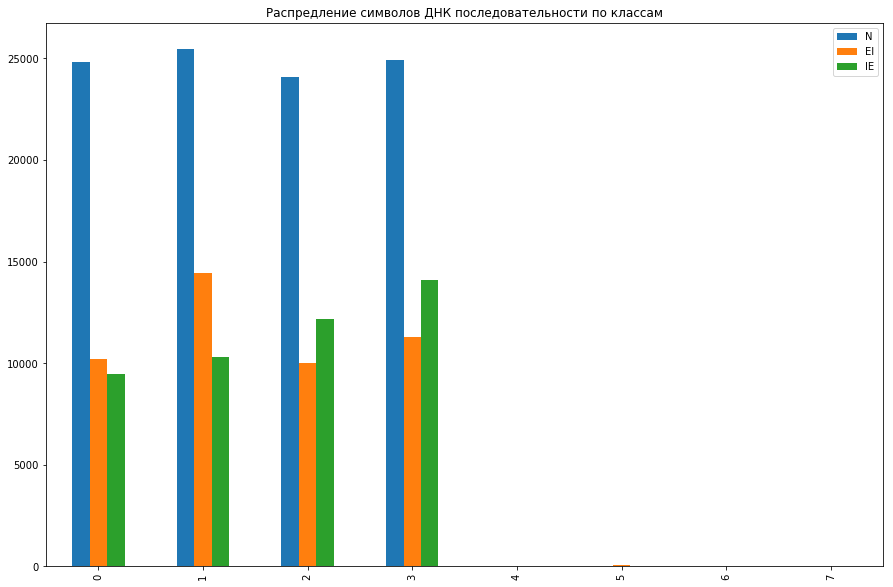

In [13]:
molecular_freq_df.plot.bar(figsize=(15,10), title='Распредление символов ДНК последовательности по классам')

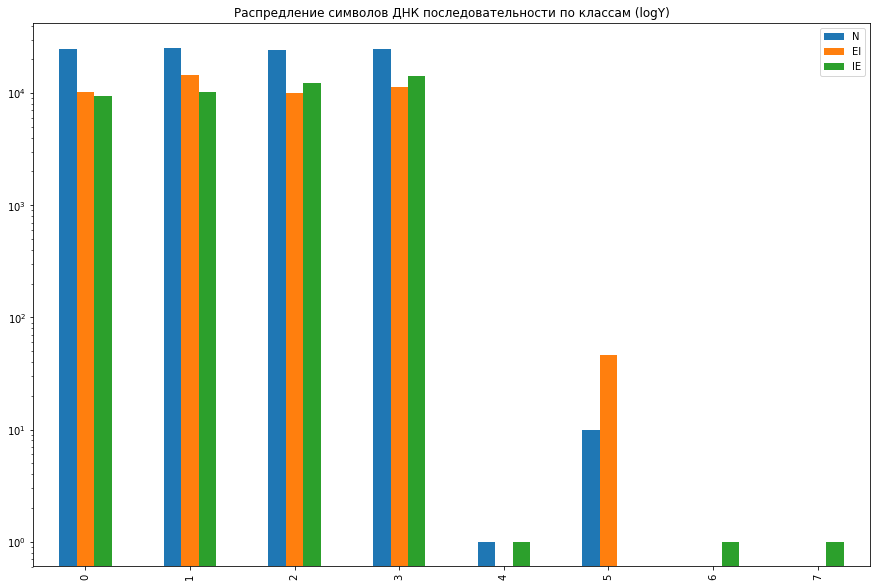

In [14]:
molecular_freq_df.plot.bar(logy=True, figsize=(15,10), title='Распредление символов ДНК последовательности по классам (logY)')

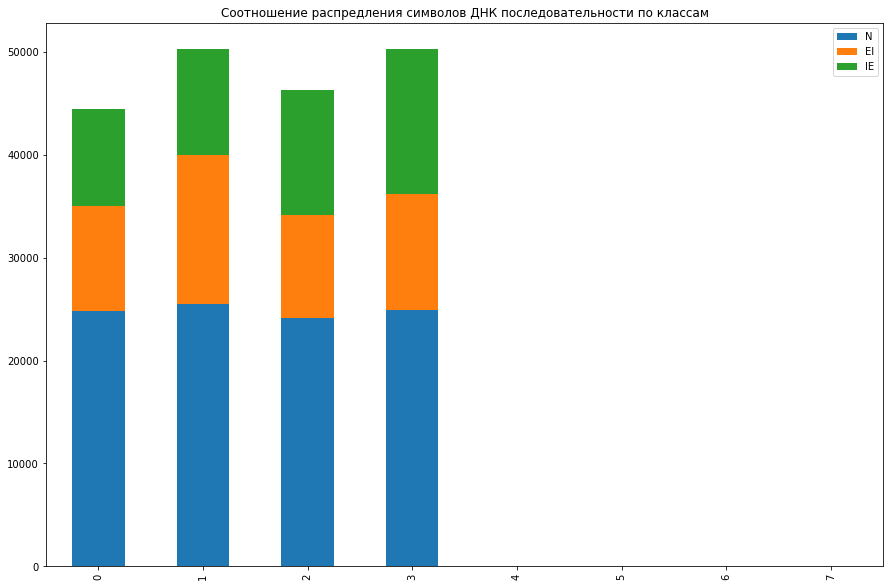

In [15]:
molecular_freq_df.plot.bar(stacked=True, figsize=(15,10), title='Соотношение распредления символов ДНК последовательности по классам')

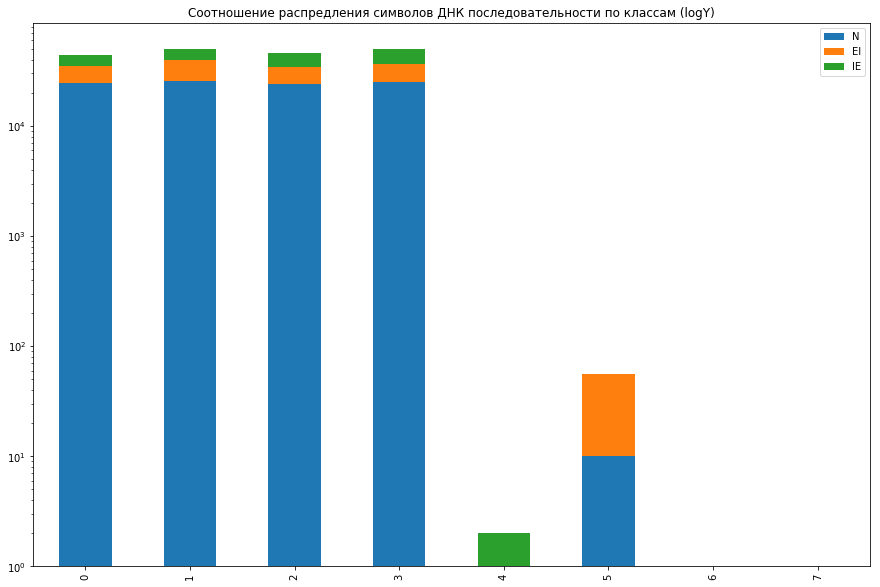

In [16]:
molecular_freq_df.plot.bar(stacked=True, logy=True, figsize=(15,10),title='Соотношение распредления символов ДНК последовательности по классам (logY)')

# X и у

In [17]:
X = molecular_data.drop(('Class'), axis = 1).drop(('Name'), axis = 1) # выбрасываем 'Class' и 'Name' столбцы
y = molecular_data['Class']
feature_names = X.columns
feature_names

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59],
      dtype='object')

In [18]:
N, d = X.shape, y.shape
N, d

((3190, 60), (3190,))

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, '+', N_test, '=', N_train + N_test)

2233 + 957 = 3190


# $k$NN

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

Выполним классификацию и вычислим значение ошибки

In [21]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.202418271384 0.276907001045


In [22]:
err_test = 1 - knn.score(X_test, y_test) # Другой способ
err_test

0.27690700104493204

In [23]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[184  26  38]
 [ 24 184   8]
 [115  54 324]]


# Neural Network
## Подбор параметров

Требуется вычислить такое значение k, при котором значение ошибки будет минимальным

In [24]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 35, 45, 55, 65, 75, 85, 95, 105, 115]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.197044334975 105


Выполним классификацию повторно при наилучшем значении k

In [25]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.187639946261 0.202716823406


Ошибка предсказания при наилучшем значении k с помощью kNN классификатора составляет примерно *0,2*

## Обучаем классификатор

In [185]:
from sklearn.neural_network import MLPClassifier

In [186]:
mlp_model1 = MLPClassifier(hidden_layer_sizes = (5000, 1), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 42)
mlp_model1.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5000, 1), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [187]:
mlp_model2 = MLPClassifier(hidden_layer_sizes = (5000, 2), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 42)
mlp_model2.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5000, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

Сделаем проверку наших моделей (с 1-им и 2-мя скрытыми слоями по 5000 нейронов в каждом) на основе 1001 элемента

In [188]:
No = 1001
test_molecular_seq = X_test.loc[No]
test_molecular_seq_class = y_test[No]
print(test_molecular_seq)
print(test_molecular_seq_class)

0     2
1     2
2     1
3     0
4     2
5     0
6     0
7     3
8     0
9     2
10    1
11    0
12    3
13    0
14    2
15    2
16    2
17    2
18    3
19    3
20    2
21    2
22    2
23    2
24    3
25    2
26    0
27    3
28    0
29    1
30    0
31    0
32    2
33    1
34    0
35    0
36    0
37    3
38    0
39    1
40    2
41    0
42    1
43    0
44    0
45    1
46    2
47    3
48    0
49    2
50    3
51    2
52    3
53    0
54    1
55    0
56    0
57    0
58    2
59    1
Name: 1001, dtype: int64
IE


In [189]:
print("Для модели с одним скрытым слоями - ", mlp_model1.predict([test_molecular_seq]))
print("Для модели с двумя скрытыми слоями - ", mlp_model2.predict([test_molecular_seq]))

Для модели с одним скрытым слоями -  ['IE']
Для модели с двумя скрытыми слоями -  ['N']


### Проверяем качество классификатора

In [190]:
y_train_pred1 = mlp_model1.predict(X_train)
y_test_pred1 = mlp_model1.predict(X_test)

y_train_pred2 = mlp_model2.predict(X_train)
y_test_pred2 = mlp_model2.predict(X_test)

In [191]:
print("Для модели с 1-им скрытым слоем - ", np.mean(y_train != y_train_pred1), np.mean(y_test != y_test_pred1))
print("Для модели с 2-мя скрытыми слоями - ", np.mean(y_train != y_train_pred2), np.mean(y_test != y_test_pred2))

Для модели с 1-им скрытым слоем -  0.247648902821 0.30303030303
Для модели с 2-мя скрытыми слоями -  0.479623824451 0.484848484848


In [192]:
print("Для модели с 1-им скрытым слоем - ", 1 - mlp_model1.score(X_test, y_test))
print("Для модели с 2-мя скрытыми слоями - ", 1 - mlp_model2.score(X_test, y_test))

Для модели с 1-им скрытым слоем -  0.30303030303
Для модели с 2-мя скрытыми слоями -  0.484848484848


### Подбор гиперпараметров
Подберем оптимальное значение параметра регуляризации alpha.
Замечание: Используем кол-во нейронов для каждого слоя - 100

In [193]:
alpha_arr = np.logspace(-3, 2, 21)

# Для модели с 1-им скрытым слоем
test_err1 = []
train_err1 = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100, 1), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err1.append(np.mean(y_train != y_train_pred))
    test_err1.append(np.mean(y_test != y_test_pred))
    
# Для модели с 2-мя скрытыми слоями
test_err2 = []
train_err2 = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100, 2), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err2.append(np.mean(y_train != y_train_pred))
    test_err2.append(np.mean(y_test != y_test_pred))

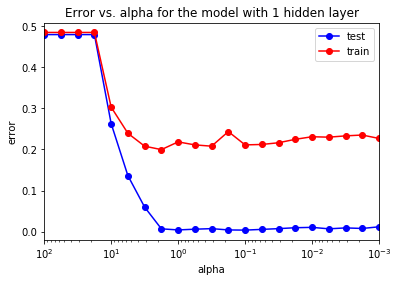

In [194]:
plt.semilogx(alpha_arr, train_err1, 'b-o', label = 'test')
plt.semilogx(alpha_arr, test_err1, 'r-o', label = 'train')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha for the model with 1 hidden layer')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

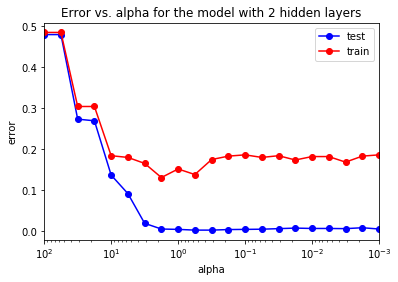

In [195]:
plt.semilogx(alpha_arr, train_err2, 'b-o', label = 'test')
plt.semilogx(alpha_arr, test_err2, 'r-o', label = 'train')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha for the model with 2 hidden layers')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

Минимальное значение ошибки:

In [196]:
#Для модели с 1-им скрытым слоем
min_train_err1 = np.min(train_err1)
min_test_err1 = np.min(test_err1)
print(min_train_err1, min_test_err1)

#Для модели с 2-мя скрытыми слоями
min_train_err2 = np.min(train_err2)
min_test_err2 = np.min(test_err2)
print(min_train_err2, min_test_err2)

0.00358262427228 0.199582027168
0.00223914017017 0.130616509927


Оптимальное значение alpha для моделей:

In [197]:
alpha_opt1 = alpha_arr[test_err1 == min_test_err1]
alpha_opt1 = alpha_opt1[0]
print("Оптимальное зачение для модели с 1-им слоем", alpha_opt1)

Оптимальное зачение для модели с 1-им слоем 1.77827941004


In [198]:
alpha_opt2 = alpha_arr[test_err2 == min_test_err2]
alpha_opt2 = alpha_opt2[0]
print("Оптимальное зачение для модели с 1-им слоем", alpha_opt2)

Оптимальное зачение для модели с 1-им слоем 1.77827941004


### Классификатор при найденном оптимальном значении alpha:
Повторим обучение:

In [199]:
mlp_model1 = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (100, 1),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model1.fit(X_train, y_train)

y_train_pred1 = mlp_model1.predict(X_train)
y_test_pred1 = mlp_model1.predict(X_test)
print("Для модели с 1-им слоем - ", np.mean(y_train != y_train_pred1), np.mean(y_test != y_test_pred1))


mlp_model2 = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (100, 2),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model2.fit(X_train, y_train)

y_train_pred2 = mlp_model2.predict(X_train)
y_test_pred2 = mlp_model2.predict(X_test)
print("Для модели с 2-мя слоями - ", np.mean(y_train != y_train_pred2), np.mean(y_test != y_test_pred2))

Для модели с 1-им слоем -  0.00582176444245 0.211076280042
Для модели с 2-мя слоями -  0.00223914017017 0.137931034483


#### Матрица рассогласования:

In [200]:
from sklearn.metrics import confusion_matrix
print("Матрица рассогласования для модели с 1-им слоем")
print(confusion_matrix(y_test_pred1, y_test))

print("Матрица рассогласования для модели с 2-мя слоями")
print(confusion_matrix(y_test_pred2, y_test))

Матрица рассогласования для модели с 1-им слоем
[[140  23  42]
 [ 41 186  22]
 [ 67   7 429]]
Матрица рассогласования для модели с 2-мя слоями
[[185  10  27]
 [ 22 195  21]
 [ 41  11 445]]


Для модели с 1-им слоем


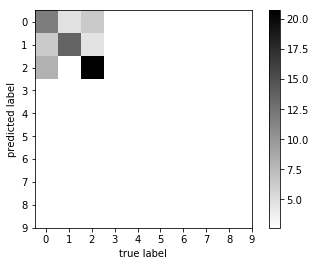

In [201]:
M = confusion_matrix(y_test_pred1, y_test)
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
print("Для модели с 1-им слоем")
pass

Для модели с 2-мя слоями


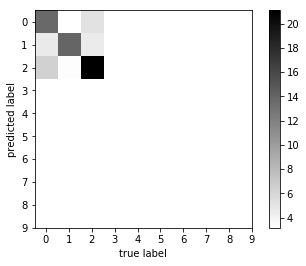

In [202]:
M = confusion_matrix(y_test_pred2, y_test)
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
print("Для модели с 2-мя слоями")
pass

Другие метрики качества:

In [203]:
from sklearn.metrics import classification_report
print("Для модели с 1-им слоем")
print(classification_report(y_test, y_test_pred1))

Для модели с 1-им слоем
             precision    recall  f1-score   support

         EI       0.68      0.56      0.62       248
         IE       0.75      0.86      0.80       216
          N       0.85      0.87      0.86       493

avg / total       0.78      0.79      0.78       957



In [204]:
print("Для модели с 2-мя слоями")
print(classification_report(y_test, y_test_pred2))

Для модели с 2-мя слоями
             precision    recall  f1-score   support

         EI       0.83      0.75      0.79       248
         IE       0.82      0.90      0.86       216
          N       0.90      0.90      0.90       493

avg / total       0.86      0.86      0.86       957

